In [1]:
#------------------------
# Google Colab上でのみ実行
#------------------------
!git clone https://github.com/konnitiha3/MOD2NN.git

import sys
sys.path.append('/content/MOD2NN')

from google.colab import drive
drive.mount('/content/drive')

Cloning into 'MOD2NN'...
remote: Enumerating objects: 219, done.
remote: Counting objects: 100% (219/219), done.
remote: Compressing objects: 100% (131/131), done.
remote: Total 219 (delta 123), reused 168 (delta 85), pack-reused 0
Receiving objects: 100% (219/219), 2.68 MiB | 4.10 MiB/s, done.
Resolving deltas: 100% (123/123), done.
Mounted at /content/drive


In [5]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
from layers import InputToCx, CxMO, FreeSpacePropagation, CxD2NNIntensity, CxD2NNMNISTDetector, ImageResize

print("TensorFlow:", tf.__version__)
print("Python:", sys.version)

plt.rcParams['font.size'] = 18

TensorFlow: 2.8.0
Python: 3.7.12 (default, Jan 15 2022, 18:48:18) 
[GCC 7.5.0]


In [17]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
model = tf.keras.models.load_model('/content/drive/MyDrive/D2NN/trained_data/20220315_1')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 image_resize_1 (ImageResize  (None, 100, 100)         0         
 )                                                               
                                                                 
 input_to_cx_1 (InputToCx)   (None, 2, 4, 100, 100)    0         
                                                                 
 cx_mo_1 (CxMO)              (None, 2, 4, 100, 100)    10000     
                                                                 
 free_space_propagation_1 (F  (None, 2, 4, 100, 100)   0         
 reeSpacePropagation)                                            
                                                                 
 cx_d2nn_intensity (CxD2NNIn  (None, 100, 100)         0     

## 正解率

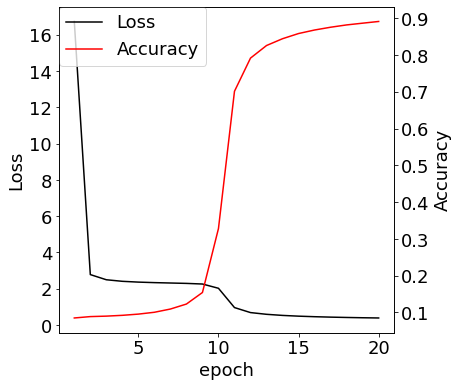

In [16]:
history = pd.read_csv('/content/drive/MyDrive/D2NN/trained_data/20220315_1/history.csv')

fig = plt.figure(figsize=(6, 6))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
ax1.plot(range(1, history.index.stop + 1), history['loss'], color='black', label='Loss')
ax1.set_ylabel('Loss')
ax1.set_xlabel('epoch')
ax2.plot(range(1, history.index.stop + 1), history['accuracy'], color='red', label='Accuracy')
ax2.set_ylabel('Accuracy')
# label1と2には、凡例用に各labelのリスト情報が入る
handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()
# 凡例をまとめて出力する
ax1.legend(handler1 + handler2, label1 + label2, loc=2, borderaxespad=0.)

## 出力プロット

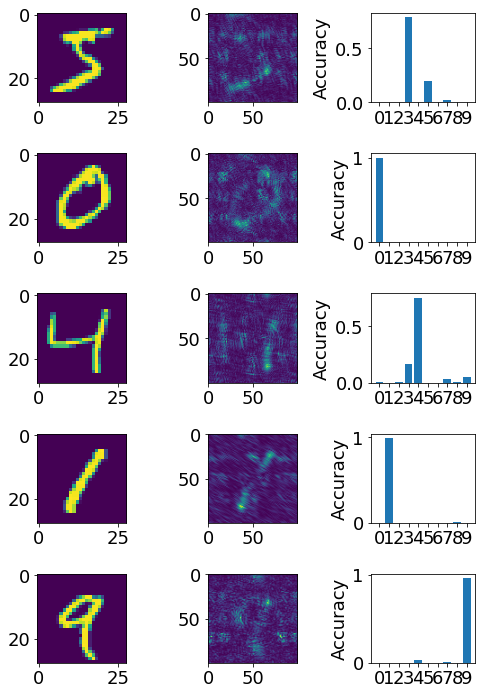

In [18]:
layer_name = model.layers[-2].name
hidden_layer_model = tf.keras.Model(inputs=model.input, outputs=model.get_layer(layer_name).output)
num = 5
images = x_train[0:num, :, :]

preds = model.predict(images)
pred_images = hidden_layer_model.predict(images)
fig, axes = plt.subplots(num, 3, figsize=(7, 10))
for i in range(num):
    axes[i, 0].imshow(images[i, :, :])
    axes[i, 1].imshow(pred_images[i, :, :])
    axes[i, 2].bar(np.arange(0, 10, 1), preds[i, :], align='center')
    axes[i, 2].set_xticks(np.arange(0, 10, 1))
    axes[i, 2].set_ylabel('Accuracy')
fig.tight_layout()